# A Simple Linear Regression Model Notebook for the Wallaroo Platform

## A Comprehensive Tutorial for:

1. Building a Linear Regression Model
2. Deploying the Model into Wallaroo
3. Using Wallaroo's Monitoring Capabilities to Analyze the Model.

### The data was used from GC Wkshps

https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation

Adarsh Pal Singh, Vivek Jain, Sachin Chaudhari, Frank Alexander Kraemer, Stefan Werner and Vishal Garg, "Machine Learning-Based Occupancy Estimation Using Multivariate Sensor Nodes," in 2018 IEEE Globecom Workshops (GC Wkshps), 2018. 

> John's Note 01:

> ### Project Description

> This is where I'd put in a description about what this project is for.  Doens't need much - just a few sentences about how this uses the data from sensors in a room to detect whether or not the room is occupied.  I also tweaked the headers - first header should be 1, then `##` for the second and describe the project.

## Steps

### Building a Simple Linear Regression Model

This model will be built from a data set of sensor values and the occupancy of the room the sensors are in.
The goal is to use the sensor data to predict the room occupancy.

> John's Note 02:

> This might be a good place to run down a few of the sensors.  What kind of sensors are in the room, what are they detecting, etc.  You don't have to list every single one, perhaps mention a few and that you'll focus on that subset and later when you picked one - why you did.

> Also - I tweaked the headers a bit.  This may be personal style, but I find it best to have headers of ## Main thing ## Steps ### Do this step ## Conclusion .  This way when either systems or people work on a TOC, they can jump right to the "Tell me what to do" and ignore the introduction (which honestly - not everyone will read if they're just looking for "how do I do a thing".  Think of it like a recipe:  Let people jump right to the recipe, don't make them scroll past 10 pages of how their grandmother made these pumpkin anchovie cookies when I was a child and.... - let them get right to the good stuff.

### **Importing the Necessary Python Libraries**

We will use a variety of libraries to implement the linear regression model

> John Note 03:  You don't need to spell it out, but might be nice if you want to list why these ones.  Usually I'll just put in "for data formatting, etc."

#### These libraries include:

- matplotlib
- numpy
- sklearn
- pandas
- onnx

In [1]:
# Code Source: Us

# Needed for data visualization
import matplotlib.pyplot as plt

# Needed for data tuning
import numpy as np

# Needed for creating the linear regression model
from sklearn import linear_model

# Needed for metrics of the model
from sklearn.metrics import mean_squared_error, r2_score

# Needed for csv importing
import pandas as pd

### **Importing the Data Set using Pandas**

> John Note 04:  Small request:  1.  You don't need to put headers in bold.  They're headers.  2. Periods at the end of sentences, even in a list.  The following could be a paragraph, but if you have them as separate sentences on separate lines, add a newline between them.

The first step creating a linear regression model is read in the dataset using the pandas library  
The `read_csv` method is responsible for reading in the data and `head()` method acesses the first few rows in the data  
When picking a variable from the data we'll use `.corr()` to find which variable has the best correlation in the dataset

> John Note 05:  My request as a non-data scientist:  If you could take a sentence to explain what `corr()` does, and then why you picked the specific variable.  Just a sentence will do. You picked `S1_Light` in the end - why that one in particular?  I don't need a novel on it - just a "because we like lights."

In [2]:
# Reading and displaying the dataset
data = pd.read_csv('Occupancy_Estimation.csv')
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
# Displays the correlations between each and every variables
correlations = data.corr()
correlations[-1:]

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
Room_Occupancy_Count,0.700868,0.671263,0.652047,0.526509,0.849058,0.788764,0.793081,0.355715,0.573748,0.557853,0.531685,0.460287,0.660144,0.601105,0.633133,0.695138,1.0


### **Pulling our Independent (x) and Dependent (y) Variables from the DataFrame**
Next we are going to access the Independent variable `S1_Light` and Dependent variable `Room_Occupancy_Count` to be stored in the x and y value  
The `values` function accesses the values in the dataset at the index of the given variable name

In [4]:
# Matrix of features x and prints data x
x = data[['S1_Light']].values
print('S1_Light Values:')
print(x)

# Array of independent variable y and prints data y
y = data['Room_Occupancy_Count'].values
print('\nRoom_Occupancy_Count Values:')
print(y)

S1_Light Values:
[[121]
 [121]
 [121]
 ...
 [  6]
 [  6]
 [  6]]

Room_Occupancy_Count Values:
[1 1 1 ... 0 0 0]


### **Splitting the Data Set into Testing and Training Subsets**
Next we use the `train_test_split()` method in the sklearn library to split the data into test and train sets 
The train_test_split gives test/train data to x and y  
Create test and train datasets with 0.2 (20%) of the dataset being test data  
The `random_state` decides which indices of data to pull from  


In [5]:
from sklearn.model_selection import train_test_split

# The train_test_split gives test/train data to x and y
# Create test and train datasets with 0.2 (20%) of the dataset being test data
# The random_state decides which indices of data to pull from
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

### **Creating the Linear Regression Model using Sklearn and Fitting our Training Data to the Model**
Now using `LinearRegression()` method we create a linear regression object which we call `regr`  
Then we take `.fit(x_train, y_train)` method uses x and y train data as parameters to see how well it fits the model

In [6]:
from sklearn.linear_model import LinearRegression

# Creating the linear regression object
regr = LinearRegression()

# The regr.fit() measures how well the x and y train data fit the model
regr.fit(x_train, y_train)

LinearRegression()

### **Predicting the Room Occupancy from our Independent Variable Test Set**
In this step we take in the independent variable test set for a the parameter in the `predict()` method in order to predict the outcome for the dependent variable.

In [7]:
# The regr.predict() creates a prediction based on the x test data
y_pred = regr.predict(x_test)

### **Finding the Metrics to Analyze the Prediction**
In this step we use various functions and methods in order to see how well our linear regression model is predicting our data. The  `coef_` function tells us the **correlation coefficient**, which shows in what way our variables correlate with each other. Next up we have the `mean_squared_error()` method, which shows us the distance from the estimated values and the true values; The best possible score would be 0. Lastly there's the `r2_score()` method which is responsible for displaying how well our data fits the current model, with an R^2 score of 1.

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Prints the coefficients
print("Coefficients: \n", regr.coef_)

# Prints the mean squared error
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

# Prints the coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.01485442]
Root mean squared error: 0.46
Coefficient of determination: 0.73


### **Plotting the Linear Regression**
Using `plt` in **matplotlib** library we can print out the different aspects of our linear regression graph.

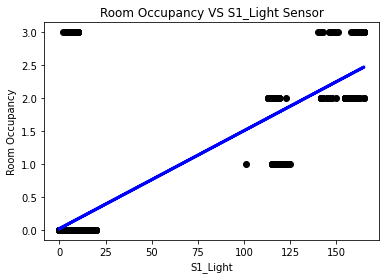

In [10]:
# The plt.scatter() plots the x and y test points in the linear regression model
plt.scatter(x_test, y_test, color="black")

# The plt.plot() creates the line of best fit
plt.plot(x_test, y_pred, color="blue", linewidth=3)

# Sets the x-axis, y-axis, and title of the model
plt.xlabel('S1_Light')
plt.ylabel('Room Occupancy')
plt.title('Room Occupancy VS S1_Light Sensor')

# The plt.show() displays the model
plt.show()

## **Deploying the Model into Wallaroo**

### **Converting the Sklearn Model into Onnx for use on the Wallaroo Platform**
For the next step refer to [sklearn-regression-to-onnx tutorial](https://docs.wallaroo.ai/wallaroo-tutorials/conversion-tutorials/sklearn-regression-to-onnx/) in the wallaroo documentation for how to convert file to onnx.

In [11]:
# Used for the conversion process
import onnx, skl2onnx, onnxmltools
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx.common.data_types import DoubleTensorType

In [12]:
# The model_to_onnx converts the model to onnx to be upload to Wallaroo Platfrom
# For more detailed steps refer to "model_conversion"
def model_to_onnx(model, cols, *, input_type='Double'):
    input_type_lower=input_type.lower()
    # How to manage float values
    if input_type=='Double':
        tensor_type=DoubleTensorType
    elif input_type=='Float':
        tensor_type=FloatTensorType
    else:
        raise ValueError("bad input type")
    tensor_size=cols
    initial_type=[(f'{input_type_lower}_input', tensor_type([None, tensor_size]))]
    onnx_model=onnxmltools.convert_sklearn(model,initial_types=initial_type)
    return onnx_model

In [13]:
# The model_to_onnx() takes the pickle file and converts it to onnx
onnx_model_converted = model_to_onnx(regr, 1)

# The onnx.save_model() saves the converted model into a file
onnx.save_model(onnx_model_converted, "occupancy_model.onnx")

### **Implementing into Wallaroo**
Reference the [Wallaroo 101 Tutorial](https://docs.wallaroo.ai/wallaroo-101/) for how to access the wallaroo platform

In [14]:
# Needed for the use of Wallaroo
import wallaroo

# The wallaroo.Client() allows the file to access wallaroo platform
wl = wallaroo.Client()

In [15]:
# Creates the name for workspace, pipeline, and model
workspace_name = 'msuproject1'
pipeline_name = 'occupancypipeline'
model_name = 'occupancymodel'

# Created to fetch the model
model_file_name = 'occupancy_model.onnx'

In [16]:
# The get_workspace() gets/create the workspace when needed
# For more detailed steps refer to "wallaroo-101"
def get_workspace(name):
    workspace = None
    for ws in wl.list_workspaces():
        if ws.name() == name:
            workspace= ws
    if(workspace == None):
        workspace = wl.create_workspace(name)
    return workspace

# The get_pipeline() gets/create the pipeline when needed
# For more detailed steps refer to "wallaroo-101"
def get_pipeline(name):
    try:
        pipeline = wl.pipelines_by_name(pipeline_name)[0]
    except EntityNotFoundError:
        pipeline = wl.build_pipeline(pipeline_name)
    return pipeline

In [17]:
# Calls function to create workspace
workspace = get_workspace(workspace_name)

# The wl.set_current_workspace() sets the workspace to currently being worked on
set_workspace = wl.set_current_workspace(workspace)

In [18]:
# Thw wl.list_workspaces() prints the lists of the workspaces
wl.list_workspaces()

Name,Created At,Users,Models,Pipelines
john.hansarick@wallaroo.ai - Default Workspace,2022-11-02 16:43:58,['john.hansarick@wallaroo.ai'],0,0
anomalyexample,2022-11-02 19:19:23,['john.hansarick@wallaroo.ai'],1,1
msuproject1,2022-11-03 15:48:58,['john.hansarick@wallaroo.ai'],0,0


In [19]:
wl.set_current_workspace(workspace)
#gw = wl.get_current_workspace()
# wl.list_models()

{'name': 'msuproject1', 'id': 3, 'archived': False, 'created_by': '2438350f-e9ac-409d-9b64-10110cba4646', 'created_at': '2022-11-03T15:48:58.939642+00:00', 'models': [], 'pipelines': []}

### Creating a Pipeline and Uploading the Model
In this step we are using `build_pipeline()`. Here we create the pipeline by giving the method a string. We defined `pipeline_name` earlier.

To upload the model we use `upload_model()`. Here we need give a string, and a file. Both we defined earlier in the tutorial.

Lastly, we add the model as a step to the pipeline using `add_model_step()`. All we have to give here is give the function our model we used earlier.

In [20]:
# The wl.get_pipeline() creates the pipeline
occupancy_pipeline = wl.build_pipeline(pipeline_name)

# The wl.upload_model() uploads the model to the platform
occupancy_model = wl.upload_model(model_name, model_file_name).configure()

In [21]:
# The occuupancy_pipeline.add_model_step() adds the model to pipeline to be deployed
occupancy_pipeline = occupancy_pipeline.add_model_step(occupancy_model)

### **Adding Validation to the model**
The `add_validation()` takes in two parameters.  

> John's Note 06: I was just writing up a validation tutorial.  I may steal your description because it is succinct, and like good code the less words, the better.  Excellent work.

**add_validation**(**string** name, **bool** condition)  

**Parameters:**
* **Name**: This must be lower-case. It is an arbitrary name used to name the condition.  
* **Condition**: This describes the condition you want to **NOT** mark as an anomaly. First, give the output values and if greater/less/equal to a chosen value.  

The validation step must be implemented before deploying the pipeline and before adding a post process step (In the current version of Wallaroo, this is a work-around to a known issue).  

In our code, we name our validation as `no_negative_people`. The condition takes in our `occupancy_model` outputs and compares it to the `float(0)`. This needs to be a float because `occupancy_model` will output floats. So we are only allowing the values greater than or equal to 0.0 to not be marked as an anomaly.


In [22]:
occupancy_pipeline = occupancy_pipeline.add_validation(
                                        'no_negative_people',
                                        occupancy_model.outputs[0][0] >= float(0)
                                        )

### Adding Post-Process
Here we are uploading another "model" to our pipeline.

> John's Note 08:  Take one line to explain why you put in post processing - is it to format the data nicer?  You know why - tell *me* why.   Also I skipped Note 7 because 6 is afraid of 7. **DONE**

First, we must take our `postproccess.py` file and upload it to Wallaroo using `wl.upload_model()`. We are naming this model `postprocess`. We are also sending our `postprocess.py` file. This time we must also configure it as a python file. 

We then need to add the model to our pipeline using `add_model_step()` as we did before with our model.
Except this time, we upload `module_post`.

In [24]:
module_post = wl.upload_model("postprocess", "./postprocess.py").configure('python')

occupancy_pipeline = occupancy_pipeline.add_model_step(module_post)

### Deploying the Model
We are close to the final step now. Here we utilize Wallaroo's amazing cluster to run our pipeline.

In [25]:
# The occupancy_pipeline.deploy() activating the pipeline
occupancy_pipeline.deploy()

Waiting for deployment - this will take up to 45s ....................... ok


name,occupancypipeline
created,2022-11-03 15:48:59.519849+00:00
last_updated,2022-11-03 16:11:09.998003+00:00
deployed,True
tags,
steps,occupancymodel


### Checking the deployment
This can be a usefull line of code, to ensure that the pipeline is running succesfully!

In [26]:
# The occupancy_pipeline.status() displays the status of the pipeline
occupancy_pipeline.status()

{'status': 'Running',
 'details': [],
 'engines': [{'ip': '10.244.4.191',
   'name': 'engine-65944c4f69-kswdv',
   'status': 'Running',
   'reason': None,
   'details': [],
   'pipeline_statuses': {'pipelines': [{'id': 'occupancypipeline',
      'status': 'Running'}]},
   'model_statuses': {'models': [{'name': 'postprocess',
      'version': '1b15971b-d2fc-4db8-ab3c-82983046fca0',
      'sha': '2b2f45afdc9a628829b347d914d87e60d61aeac63455f95bc9307953e190e3c3',
      'status': 'Running'},
     {'name': 'occupancymodel',
      'version': 'f8b80025-0a56-416b-b859-046e4322d1ab',
      'sha': 'b65c9345325e8eb2369528e761b15b48b5a72ffae581f247963b527a21c21f31',
      'status': 'Running'}]}}],
 'engine_lbs': [{'ip': '10.244.5.6',
   'name': 'engine-lb-797d976fcf-trh9t',
   'status': 'Running',
   'reason': None,
   'details': []}],
 'sidekicks': []}

#### Making an Inference

Finally, we get to utilize all of our work and put it into production.

In [27]:
# Needed for the infrences
import json
from wallaroo.object import EntityNotFoundError

# The pandas_to_dict() converts the values into dictionary for infrences
def pandas_to_dict(df):
    input_dict = {
    'tensor': df.to_numpy().tolist()
    }
    return input_dict

#### Extracting data

Here we just need to grab the data from our set that we want to infer upon.

#### Getting Single Datums

In our setting, we will pretend that our sensors are sending our pipeline a single datum at a time. In our scenrio, we will send a good datum (something that won't trigger a validation error) and we will also send a bad datum (something that will trigger a validation error).

In [29]:
good_data = pandas_to_dict(pd.read_csv('Good_Datum.csv').iloc[:,6:7])
bad_data = pandas_to_dict(pd.read_csv('Bad_Datum.csv').iloc[:,6:7])

good_data

{'tensor': [[121]]}

#### Making the inference

`occupancy_pipeline.infer()`  
This method takes our input data that we pulled from our data, and creates the inference. 

The result shows the data we placed in, the outputs from the inference, and lastly, our post process step that rounds the numbers.

`result[0].data()[0].tolist()`  
This makes the result a little easier to see.

In [30]:
# The occupancy_pipeline.infer() creates a result based on data given
good_result = occupancy_pipeline.infer(good_data)
good_result

# print("Finalized Data")
# good_result[0].data()[0].tolist()

[InferenceResult({'check_failures': [],
  'elapsed': 402904,
  'model_name': 'postprocess',
  'model_version': '1b15971b-d2fc-4db8-ab3c-82983046fca0',
  'original_data': {'tensor': [[121]]},
  'outputs': [{'Json': {'data': [{'original': {'outputs': [{'Double': {'data': [1.8181524064645576],
                                                                       'dim': [1,
                                                                               1],
                                                                       'v': 1}}]},
                                  'prediction': [2.0]}],
                        'dim': [1],
                        'v': 1}}],
  'pipeline_name': 'occupancypipeline',
  'shadow_data': {},
  'time': 1667492155109})]

In [31]:
# The occupancy_pipeline.infer() creates a result based on data given
bad_result = occupancy_pipeline.infer(bad_data)
bad_result

# print("Finalized Data")
# bad_result[0].data()[0].tolist()

[InferenceResult({'check_failures': [{'False': {'expr': 'occupancymodel.outputs[0][0] >= 0'}}],
  'elapsed': 320704,
  'model_name': 'postprocess',
  'model_version': '1b15971b-d2fc-4db8-ab3c-82983046fca0',
  'original_data': {'tensor': [[-121]]},
  'outputs': [{'Json': {'data': [{'original': {'outputs': [{'Double': {'data': [-1.776617515968567],
                                                                       'dim': [1,
                                                                               1],
                                                                       'v': 1}}]},
                                  'prediction': [-2.0]}],
                        'dim': [1],
                        'v': 1}}],
  'pipeline_name': 'occupancypipeline',
  'shadow_data': {},
  'time': 1667492155529})]

#### Undeploy the pipeline

This part is crucial, you do not want take up more resources than you meant to. 

In [ ]:
# The occupancy_pipeline.undeploy() deactivates the pipeline
occupancy_pipeline.undeploy()

#### Logs

`.logs()`

Lastly, we can view the logs of our pipeline. Even if the pipeline is no longer deployed.

> John's Note 09:  The pipeline logs can be deployed, even after the pipeline is undeployed. **DONE**


In [ ]:
logs = occupancy_pipeline.logs()
logs